# <A1_퍼포먼스_팩토리_마케팅_광고_최적화>

## [배경] 


## [주제]
광고 마케팅 최적화 알고리즘 모델링

## [설명]




# [데이셋 정보]

### 1. bidding_result.csv [파일] 


### 2. log_csv.csv [파일]


### 3. 결론



데이터를 확인한 결과는 다음과 같습니다.

index = 48896

Impression = 2734

Click = 189

Cost = 2406

Sum of AD rank = 99529

Bid = 286

Price(PC) = 7516

Price(Mobile) = 7516

Delivery Fee = 116

Category Name 1 = 10

Category Name 2 = 126

Category Name 3 = 545

Category Name 4 = 734

date = 57


       

# 1. Data Load & Data library Load

data_info에서 떠오르는 생각 & 도메인

Advertiser : 광고주
광고의 주체로서 광고비용을 부담하는 조직체 또는 개인을 말함.

Advertising : 광고
확인 가능한 광고주가 다양한 매체를 통해, 제품이나 서비스 또는 아이디어에 관해 통상적으로 유료이며 대개는 설득적인 정보의 비대인적인 커뮤니케이션활동을 말함.

광고주 [advertiser]란 광고활동 하는 주체자를 말하는 것으로, 광고활동에는 광고대행사와 매체가 관련되기 때문에 이들과 구별하는 뜻에서 광고주라고 합니다.

대체로 광고주는 광고 계획안의 기본을 작성한 뒤 표현 ·매체 ·제작 등과 관련되는 일체의 일을 광고대행사에 맡기게 됩니다.

광고대행사 쪽에서 보면 광고주는 고객이므로 클라이언트(client)라고 합니다. 광고주를 스폰서라고 표현하기도 하지만, 이 표현은 대개 전파매체 광고주인 경우에 쓰이는 말입니다.


<입찰=bid>




In [ ]:
# !pip install catboost
# !pip install xgboost
# !pip install lightgbm

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# 데이터분석 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib as mpl
import os
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import math
from sklearn.model_selection import StratifiedKFold as kfold
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold as kfold
# from sklearn.ensemble import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures



# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rc("font", family="Malgun Gothic")
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings('ignore')

In [22]:
# A1 퍼포먼스 팩토리 데이터 불러오기
base_path = "/content/drive/MyDrive/Colab Notebooks/A1_퍼포먼스 팩토리 with 김재승/"

bidding = pd.read_csv(base_path + "bidding_results_adding.csv", encoding="utf-8" )
log = pd.read_csv(base_path + "log_csv.csv",  encoding="utf-8")


# 2. EDA

In [5]:
bidding.head(10)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
5,4132077,17,0,0.0,8.529412,50,663000,663000,0,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031
6,4158472,138,2,270.0,4.420290,240,129000,129000,0,가구/인테리어,아동/주니어가구,책장,NaN,20221031
7,4159062,60,1,50.0,10.366667,50,699000,699000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
8,4159064,8,0,0.0,9.625000,50,169000,169000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
9,4159066,76,3,640.0,5.421053,250,149000,149000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031


In [6]:
bidding.tail(10)

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
1337078,2566230,85,2,860.0,1.611765,500,36800,36800,0,생활/건강,욕실용품,수건/타월,세면타월,20230103
1337079,2566332,16,1,260.0,1.937500,500,17900,17900,0,생활/건강,청소용품,휴지통,다용도휴지통,20230103
1337080,2566781,10,0,0.0,2.000000,500,7800,7800,3000,생활/건강,문구/사무용품,카드/엽서/봉투,엽서,20230103
1337081,2566783,40,0,0.0,10.200000,500,14300,14300,3000,생활/건강,문구/사무용품,다이어리/플래너,다이어리,20230103
1337082,2566784,119,3,990.0,5.445378,500,9500,9500,0,생활/건강,문구/사무용품,다이어리/플래너,캘린더/달력,20230103
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103
1337087,2566923,14,0,0.0,12.428571,500,128800,128800,0,가구/인테리어,인테리어소품,액자,퍼즐/그림/사진액자,20230103


In [23]:
bidding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337088 entries, 0 to 1337087
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   index            1337088 non-null  int64  
 1   Impression       1337088 non-null  int64  
 2   Click            1337088 non-null  int64  
 3   Cost             1337088 non-null  float64
 4   Sum of AD rank   1337078 non-null  float64
 5   Bid              1337088 non-null  int64  
 6   Price(PC)        1337088 non-null  int64  
 7   Price(Mobile)    1337088 non-null  int64  
 8   Delivery Fee     1337088 non-null  int64  
 9   Category Name 1  1337088 non-null  object 
 10  Category Name 2  1337088 non-null  object 
 11  Category Name 3  1331221 non-null  object 
 12  Category Name 4  930132 non-null   object 
 13  date             1337088 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 142.8+ MB


In [8]:
log.head(10)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
6,6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,NaN,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
7,7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,2022-12-29 15:32:12,Gangnam-gu,Windows,100.0,8483
8,8,d8SbF2KNyXIAClrS,View,실내운동,유산소,스텝퍼,2022-12-29 16:15:35,NaN,Windows,100.0,2944
9,9,tuFJqmMTmj0AAIxD,View,가구,침대,침대프레임,2022-12-29 10:44:35,Osan,Android,100.0,1215


In [9]:
log.tail(10)

,Unnamed: 0,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
5659531,5659531,fG9bBGOiwtgAAuZu,Highlight,조명,형광등·조명부속품,전구·형광등,2022-12-28 15:20:28,Cheonan,Windows,0.0,0
5659532,5659532,cLkIu2OXMw8AA9Dr,Basket,주방용품,주방수납·정리,홀더,2022-12-28 22:14:15,Haman,Windows,0.0,0
5659533,5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659535,5659535,0//H1mOs/wgABiw0,View,수납·정리,행거,NaN,2022-12-29 13:14:04,Seoul,Windows,100.0,2006
5659536,5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030
5659540,5659540,bgy5ZGOszc4ADrmd,View,가구,화장대·콘솔,일반화장대,2022-12-29 08:14:39,Iksan,iOS,0.0,0


In [24]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659541 entries, 0 to 5659540
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   uid              object 
 2   action_type      object 
 3   category1        object 
 4   category2        object 
 5   category3        object 
 6   collect_time     object 
 7   geoip_city_name  object 
 8   useragent_os     object 
 9   viewrate         float64
 10  viewtime         int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 475.0+ MB


In [25]:
bidding.isnull().sum(axis=0)

index                   0
Impression              0
Click                   0
Cost                    0
Sum of AD rank         10
Bid                     0
Price(PC)               0
Price(Mobile)           0
Delivery Fee            0
Category Name 1         0
Category Name 2         0
Category Name 3      5867
Category Name 4    406956
date                    0
dtype: int64

In [26]:
log.isnull().sum(axis=0)

Unnamed: 0              0
uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [ ]:
# bidding.drop(columns="Unnamed: 0", inplace=True)

In [28]:
bidding

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337083,2566795,5,0,0.0,13.200000,500,19900,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337084,2566880,3,0,0.0,17.000000,500,23900,23900,3000,생활/건강,문구/사무용품,이벤트/파티용품,데코용품,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103
1337086,2566891,2,0,0.0,4.000000,500,21000,21000,3000,생활/건강,정원/원예용품,화분받침,NaN,20230103


In [30]:
log.drop(columns="Unnamed: 0", inplace=True)

In [31]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


# 결측치 제거하기

In [14]:
# 제거한 이유는 평균값이나 대체값으로 하기에는 기준을 세우기가 애매해서 다 지우고 하는것이 낫다고 판단 애매하게 대체값으로 하면 데이터 결과값에 왜곡되기 쉽다. 
bidding.dropna()

,index,Impression,Click,Cost,Sum of AD rank,ON/OFF,Bid,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,91726046,12,0,0,3.000000,0,100,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,91726318,12,0,0,3.333333,0,100,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,92003128,14,0,0,8.000000,0,100,가구/인테리어,거실가구,소파,패브릭소파,20221031
5,92004538,68,0,0,8.529412,0,300,가구/인테리어,침실가구,침대,슈퍼싱글침대,20221031
10,92018310,9,0,0,1.000000,0,300,가구/인테리어,침실가구,침대,침대프레임,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...
1136958,110619184,34,2,600,11.588235,0,300,가구/인테리어,인테리어소품,조명,인테리어조명,20221227
1136959,110619184,38,0,0,11.526316,0,300,가구/인테리어,인테리어소품,조명,인테리어조명,20221227
1136960,110619186,136,0,0,7.500000,0,200,가구/인테리어,인테리어소품,조명,인테리어조명,20221227
1136961,110619186,480,0,0,8.783333,0,300,가구/인테리어,인테리어소품,조명,인테리어조명,20221227


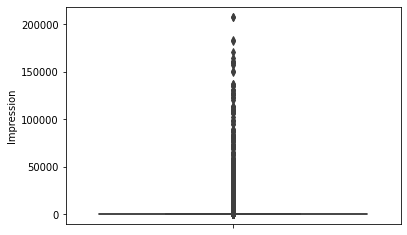

In [16]:
sns.boxplot(data=bidding, y="Impression")

In [25]:
bidding.describe()

# 클릭수를 제외하고 모두 편차가 심하다.

,index,Impression,Click,Cost,Sum of AD rank,Bid,Price(PC),Price(Mobile),Delivery Fee,date
count,1.337088e+06,1.337088e+06,1.337088e+06,1.337088e+06,1.337078e+06,1.337088e+06,1.337088e+06,1.337088e+06,1.337088e+06,1.337088e+06
mean,5.167098e+06,4.412753e+01,7.189467e-01,1.800053e+02,1.138271e+01,2.631728e+02,1.826830e+05,1.826830e+05,2.005842e+03,2.022173e+07
std,2.655813e+06,3.434510e+02,3.423456e+00,1.772706e+03,1.323231e+01,2.769174e+02,4.544135e+05,4.544135e+05,5.423991e+03,2.184658e+03
min,2.578600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+01,2.000000e+03,2.000000e+03,-1.000000e+00,2.022103e+07
25%,3.300168e+06,3.000000e+00,0.000000e+00,0.000000e+00,3.706897e+00,5.000000e+01,1.980000e+04,1.980000e+04,0.000000e+00,2.022112e+07
50%,4.637081e+06,1.000000e+01,0.000000e+00,0.000000e+00,7.090909e+00,2.000000e+02,5.900000e+04,5.900000e+04,0.000000e+00,2.022120e+07
75%,7.290770e+06,3.100000e+01,0.000000e+00,0.000000e+00,1.341026e+01,3.500000e+02,1.790000e+05,1.790000e+05,3.000000e+03,2.022122e+07
max,9.984108e+06,7.860700e+04,4.740000e+02,3.253000e+05,1.000000e+02,4.000000e+03,1.500000e+07,1.500000e+07,1.450000e+05,2.023010e+07


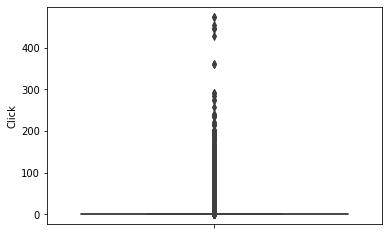

In [26]:
sns.boxplot(data=bidding, y="Click")

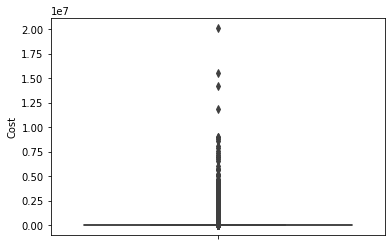

In [19]:
sns.boxplot(data=bidding, y="Cost")

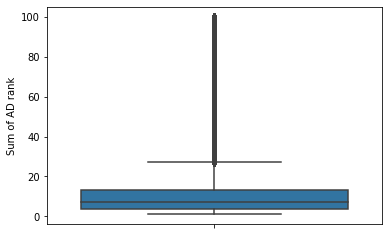

In [20]:
sns.boxplot(data=bidding, y="Sum of AD rank")

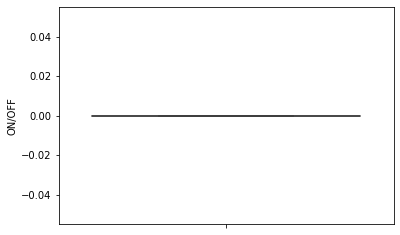

In [21]:
sns.boxplot(data=bidding, y="ON/OFF")

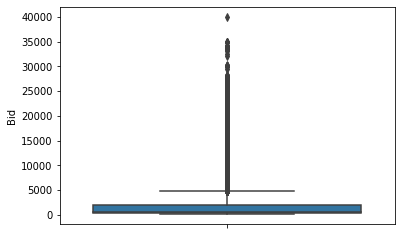

In [23]:
sns.boxplot(data=bidding, y="Bid")

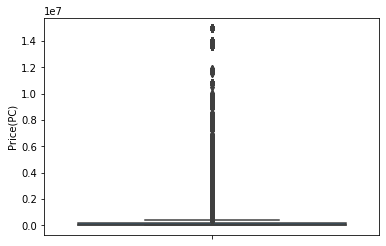

In [5]:

sns.boxplot(data=bidding, y="Price(PC)")

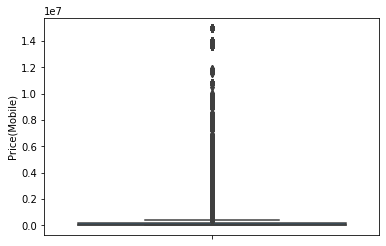

In [6]:
sns.boxplot(data=bidding, y="Price(Mobile)")

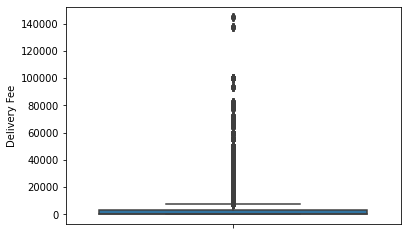

In [7]:

sns.boxplot(data=bidding, y="Delivery Fee")

In [20]:

column_names = bidding.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

type(column_names)
print(column_names, "\n")


for i in column_names:
     print(f"{i} = {bidding[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

['index', 'Impression', 'Click', 'Cost', 'Sum of AD rank', 'Bid', 'Price(PC)', 'Price(Mobile)', 'Delivery Fee', 'Category Name 1', 'Category Name 2', 'Category Name 3', 'Category Name 4', 'date'] 

index = 48896
Impression = 2734
Click = 189
Cost = 2406
Sum of AD rank = 99529
Bid = 286
Price(PC) = 7516
Price(Mobile) = 7516
Delivery Fee = 116
Category Name 1 = 10
Category Name 2 = 126
Category Name 3 = 545
Category Name 4 = 734
date = 57


In [19]:
log.dropna()

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
2,r8DXy2OtSl8AAojG,View,패브릭,커튼·부자재,암막커튼,2022-12-29 17:11:30,Seoul,iOS,100.0,947
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
...,...,...,...,...,...,...,...,...,...,...
5659536,PUpxWWMWdcIACR2B,View,주방용품,칼·커팅기구,채칼·다지기·강판,2022-12-28 20:01:30,Seoul,Android,100.0,13893
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217
5659539,dusFzWJvp5cADhZW,View,가전·디지털,계절가전,전기히터·온풍기,2022-12-28 11:07:30,Seoul,Android,100.0,54030


In [22]:
column_names = bidding.columns.values.tolist() 

for i in column_names:
     print(f"{i} = {bidding[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

index = [3575092 3575637 4129259 ... 2566881 2566891 2566923]
Impression = [   3    6    7 ... 8125 1957 1590]
Click = [  0   3   2   1   5  15  12   4   8   6  10   7  14  13  11  22  26  17
  21  18  46  27  16   9  19  39  25  35  74  49  59  20  43  28  50  63
  33  37  24  36  23  55  67  38  32 100  42  30  31  44  41  79  47 145
  29  82  84  85  54 150  34  97  45  64  56  75  62  61 123 154  68  86
  60 114  40  78 105  51  48  58 102  65  88  94  52  53  90  99 109 101
  83  92 118  98 138  96  57 129 116  80 120  89 117  77 361  69 144  87
 141 121  71 360  95  66 107 136 146 147 181 131 180  93 124  91 214  81
 128 113  76  70 275 188 104 122 157 142 474 183 200 134 238 130 203 111
 217 133 292 132 103 192 175 135  73  72 110 119 106 193 196 140 176 187
 195 240 257 177 156 152 115 112 444 148 234 184 160 127 151 170 159 149
 163 162 178 285 448 221 429 108 455]
Cost = [    0.   150.   270. ... 29160. 15800. 10160.]
Sum of AD rank = [3.         3.33333333 8.         ... 1.4

In [23]:
column_names = log.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

type(column_names)
print(column_names, "\n")


for i in column_names:
     print(f"{i} = {log[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

['uid', 'action_type', 'category1', 'category2', 'category3', 'collect_time', 'geoip_city_name', 'useragent_os', 'viewrate', 'viewtime'] 

uid = 828536
action_type = 5
category1 = 3373
category2 = 737
category3 = 1752
collect_time = 702267
geoip_city_name = 3197
useragent_os = 13
viewrate = 1921
viewtime = 263194


In [24]:
column_names = log.columns.values.tolist() 

for i in column_names:
     print(f"{i} = {log[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

uid = ['avpKyWMn/xEADNlb' '0+5vEmGkOuAAB5j2' 'r8DXy2OtSl8AAojG' ...
 'dusqTmOtPa8AB46D' 'AeCSamOsMCsACJDD' 'PUpxWWMWdcIACR2B']
action_type = ['View' 'Basket' 'Highlight' 'Copy' 'SINF']
category1 = ['주방용품' '패브릭' '데코·식물' ... '홀러' '올리그로우' '톰의다락방']
category2 = ['그릇·홈세트' '매트' '커튼·부자재' '플라워·식물' '진열장·책장' '화장대·테이블정리' '꾸미기팁' '테이블·식탁·책상'
 '유산소' '침대' '유아동패브릭' '러그·카페트' '욕실용품' '홈갤러리' '이불·이불솜' '서랍·수납장' '토퍼·패드' '전기'
 '소파' '행거·옷장' '블라인드·롤스크린' '거실장·TV장' '거울' '세탁기·건조기' '청소기' '페인트·부자재'
 '무드등·장식조명' '보관·용기·도시락' '냉장고' '세탁세제·유연제' '인테리어소품' '강아지' '공간별조명' '단스탠드'
 '계절가전' '홈패브릭' '지식백과' '의자' '청소' '주방가전' '가구' '컴퓨터·노트북' '생활정보' '가벽·파티션'
 '옷정리·이불정리' '컵·잔·텀블러' '청소용품' '데코·식물' '수건·타월' '손잡이·방문·유리' '캠핑주방용품'
 '주방수납·정리' '보호대' '수납' '냄비·프라이팬·솥' 'DIY·취미·공예' '반려동물' '의자·소파' '주방용품' '양치용품'
 '매트리스·토퍼' '수저·커트러리' '화장대·콘솔' '제습·탈취·방향제' '유아용패브릭' '베개·베개커버' '밀키트' '생활잡화'
 '벽지·시트지' 'DIY&리폼' '장스탠드' '서랍장·트롤리' '완구·교구' '소파·생활커버' '디퓨저·캔들' '캠핑생활용품'
 '캠핑가구' '세탁용품' '선반' '크리스마스' '음향가전' '리빙박스·바구니' '휴대폰' '쿠션·방석' '타일·파벽돌'
 '생수·음료·커피' '식기건조대' '고양이' '형광등·

In [10]:
bidding["CTR"] = (bidding["Click"]/bidding["Impression"]) * 100
bidding["CPC"] = (bidding["Cost"]/bidding["Click"])
bidding["CPM"] = (bidding["Cost"]/1000)

In [19]:
bidding

Int64Index([], dtype='int64')

In [18]:
bidding

Int64Index([], dtype='int64')

In [ ]:
# # "-" 값 제거 임시로
# bidding = bidding[bidding["Category Name 4"]== "NaN"].index
# bidding.drop(bidding)

In [ ]:
sns.boxplot(x='weight_restricted', y="target", data=train)

In [ ]:
# 총 60개의 도로, 586개의 시작/도착 (위경도), 487개의 시작/도착 도로명 
column_names = train.columns.values.tolist()   # tolist() 는 리스트로 묶어주는 함수

type(column_names)
print(column_names, "\n")


for i in column_names:
     print(f"{i} = {train[i].nunique()}")  # nunique()는 데이터에 고유값들의 수를 출력해주는 함수입니다

In [ ]:
column_names = train.columns.values.tolist() 

for i in column_names:
     print(f"{i} = {train[i].unique()}")  # 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

### EDA_시각화

In [ ]:
# one-hot_encoding
# pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

# train_ = train[["day_of_week",'start_turn_restricted' ,'end_turn_restricted']]
# train_encoding_dummy = pd.get_dummies(train_, columns=["day_of_week",'start_turn_restricted' ,'end_turn_restricted'])

In [ ]:
# nominal 데이터 인데 labelEncoder를 사용했음.
from sklearn.preprocessing import LabelEncoder

items =  ["day_of_week",'start_turn_restricted' ,'end_turn_restricted']
train_encoding = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train_encoding[i])
    train_encoding[i] = encoder.transform(train_encoding[i])

train_encoding.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

items =  ["day_of_week",'start_turn_restricted' ,'end_turn_restricted']
test_encoding = test.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(test_encoding[i])
    test_encoding[i] = encoder.transform(test_encoding[i])

# 데이터 분포확인 

In [ ]:
# Train / Test 세트 비교
# train, test = 0-금  1-목   2-수  3-월  4-일  5-토  6-화
# start_trun_restrict,end_turn_restrict = 0:없음, 1:있음
fig, axes = plt.subplots(12, 2, figsize=(30,30))

sns.countplot(x='day_of_week', data=train_encoding, ax=axes[0][0])
sns.countplot(x='day_of_week', data=test_encoding, ax=axes[0][1])
sns.countplot(x='base_hour', data=train_encoding, ax=axes[1][0])
sns.countplot(x='base_hour', data=test_encoding, ax=axes[1][1])
sns.countplot(x='lane_count', data=train_encoding, ax=axes[2][0])
sns.countplot(x='lane_count', data=test_encoding, ax=axes[2][1])
sns.countplot(x='road_rating', data=train, ax=axes[3][0])
sns.countplot(x='road_rating', data=test, ax=axes[3][1])
sns.countplot(x='connect_code', data=train, ax=axes[4][0])
sns.countplot(x='connect_code', data=test, ax=axes[4][1])
sns.countplot(x='multi_linked', data=train_encoding, ax=axes[5][0])
sns.countplot(x='multi_linked', data=test_encoding, ax=axes[5][1])
sns.countplot(x='maximum_speed_limit', data=train_encoding, ax=axes[6][0])
sns.countplot(x='maximum_speed_limit', data=test_encoding, ax=axes[6][1])
sns.countplot(x='weight_restricted', data=train_encoding, ax=axes[7][0])
sns.countplot(x='weight_restricted', data=test_encoding, ax=axes[7][1])
sns.countplot(x='road_type', data=train_encoding, ax=axes[8][0])
sns.countplot(x='road_type', data=test_encoding, ax=axes[8][1])
sns.countplot(x='start_turn_restricted', data=train_encoding, ax=axes[9][0])
sns.countplot(x='start_turn_restricted', data=test_encoding, ax=axes[9][1])
sns.countplot(x='end_turn_restricted', data=train_encoding, ax=axes[10][0])
sns.countplot(x='end_turn_restricted', data=test_encoding, ax=axes[10][1])
sns.countplot(x='target', data=train, ax=axes[11][0])

plt.tight_layout()
plt.show()

In [ ]:
# road_rating = 3개의 값.
# weight_restricted = 대부분 0.
# maximum_speed_limit = 60이 제일 많음.
# lane_count는 2차선이 제일 많음
# 연속적인 데이터는 없음.


fig, axes = plt.subplots(3, 2, figsize=(20,10))

sns.histplot(x=train['road_rating'],kde=False,ax=axes[0][0], color='blue')  #kde는 선을 넣을것인지 아닌지를 표시한다.
sns.histplot(x=train['weight_restricted'],kde=False,ax=axes[0][1], color='blue')
sns.histplot(x=train['maximum_speed_limit'],kde=False,ax=axes[1][0], color='blue')
sns.histplot(x=train['lane_count'],kde=False,ax=axes[1][1], color='blue')
sns.histplot(x=train['target'],kde=True,ax=axes[2][0], color='blue')


plt.tight_layout()
plt.show()

In [ ]:
train1 = train.copy()
train1['freq'] = train1.groupby('road_name')['road_name'].transform('count')
train1 = train1[['road_name','freq']]
train1 = train1.groupby('road_name').mean().reset_index()
train1.plot.bar(x='road_name',y='freq',figsize=(20,3))
plt.show()

# 두 변수(열)간의 상관관계 분석

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),square=True, annot=True, ax=ax, cmap="YlGnBu")

In [ ]:
# 그룹화
train_date = train_encoding[['base_date','target']]
train_date = train_date.groupby('base_date').mean().reset_index()

train_time = train_encoding[['base_hour','target']]
train_time = train_time.groupby('base_hour').mean().reset_index()

train_day = train_encoding[['day_of_week','target']]
train_day = train_day.groupby('day_of_week').mean()
train_day = train_day.reset_index()

train_name = train_encoding[['road_name','target']]
train_name = train_name.groupby('road_name').mean().reset_index()

In [ ]:
# 추이 그래프
fig, axes = plt.subplots(4, figsize=(15,12))

sns.lineplot(x='base_date',y='target',data=train_date,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')
sns.barplot(x='road_name',y='target',data=train_name,ax=axes[3]).set(title='road_name vs target')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# object 타입을 datetime64[ns] 타입으로 바꾼다 
train_encoding['base_date'] = pd.to_datetime(train_encoding['base_date'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [ ]:
# 년/월/일로 분리
train_encoding['year']= train_encoding['base_date'].dt.year
train_encoding['month']= train_encoding['base_date'].dt.month
train_encoding['day']= train_encoding['base_date'].dt.day

In [ ]:
# 년도/월/일별 추이 그래프
# year: 뚜렷한 차이 없음.
# month: 7월 교통량 급증가 -> 여름휴가?
# day: 뚜렷한 차이 없음.
# 월별 차이가 제일 뚜렷함.

# fig, axes = plt.subplots(3, figsize=(15,8))

# sns.lineplot(x='year',y='target',data=train_encoding,ax=axes[0]).set(title='year vs target')
# sns.lineplot(x='month',y='target',data=train_encoding,ax=axes[1]).set(title='month vs target')
# sns.lineplot(x='day',y='target',data=train_encoding,ax=axes[2]).set(title='day vs target')

# plt.tight_layout()
# plt.show()

In [ ]:
# 최대속도제한,무게제한 VS t=target
# 최대속도제한에서 30km에서 평균속도 30km
# 무게제한이 없는 곳일수록 교통혼잡하고
# 최대속도제한인 30,50, 60, 70인 곳에서 교통혼잡이 일어난다는 것을 알았다.
fig, axes = plt.subplots(2, figsize=(15,8))

sns.barplot(x='maximum_speed_limit',y='target',data=train,ax=axes[0]).set(title='maximum_speed_limit vs target')
sns.barplot(x='weight_restricted',y='target',data=train,ax=axes[1]).set(title='weight_restricted vs target')

plt.tight_layout()
plt.show()

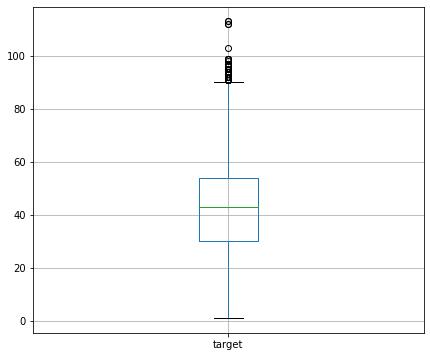

In [ ]:
plt.figure(figsize=(7,6))
boxplot = train.boxplot(column=["target"])
plt.show()

In [ ]:
train_temp = train[["road_name", "maximum_speed_limit"]]
df_max_speed_per_nodename = train_temp.groupby("road_name").max()
df_max_speed_per_nodename.rename(columns = {"maximum_speed_limit" : "maximum_speed_limit(max)"}, inplace = True)


In [ ]:
df_min_speed_per_nodename = train_temp.groupby("road_name").min()
df_min_speed_per_nodename.rename(columns = {"maximum_speed_limit" : "maximum_speed_limit(min)"}, inplace = True)

In [ ]:
# 도로별 최고속도 및 최저속도 비교
result = pd.concat([df_max_speed_per_nodename,df_min_speed_per_nodename], axis=1)
result

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
-,80.0,30.0
경찰로,60.0,60.0
고평교,50.0,50.0
관광단지1로,30.0,30.0
관광단지2로,30.0,30.0
...,...,...
첨단로,50.0,50.0
태평로,50.0,50.0
한천로,60.0,60.0


In [ ]:
# "-" 값 제거 임시로
index1 = train[train["road_name"]== "-"].index
train.drop(index1, inplace=True)

In [ ]:
# 도로별 최고속도  top 10 확인
# 도로별 최저속도   top 10 확인

In [ ]:
# 도로별 max와 min이 서로다른 구간
result.loc[result["maximum_speed_limit(max)"] != result["maximum_speed_limit(min)"]]

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
-,80.0,30.0
남조로,60.0,50.0
동홍로,60.0,50.0
산서로,60.0,50.0
새서귀로,60.0,30.0
서사로,50.0,30.0
신대로,70.0,30.0
연북로,50.0,30.0
일반국도11호선,70.0,30.0


In [ ]:
# maximum speed : 30, 50, 60, 70 일때 확인
# 위의 네개 값에서 교통혼잡이 많이 일어날거라 추론함.

trafic_jam_30 = result.loc[result["maximum_speed_limit(max)"] <= 30]
trafic_jam_30

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
관광단지1로,30.0,30.0
관광단지2로,30.0,30.0
관광단지로,30.0,30.0
시민광장로,30.0,30.0
호근로,30.0,30.0


In [ ]:
jam_list_30 = trafic_jam_30.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_30)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

In [ ]:
trafic_jam_50 = result.loc[result["maximum_speed_limit(max)"] == 50]
trafic_jam_50

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
고평교,50.0,50.0
동문로,50.0,50.0
동부관광도로,50.0,50.0
삼무로,50.0,50.0
서사로,50.0,30.0
신광로,50.0,50.0
애원로,50.0,50.0
연동로,50.0,50.0
연북로,50.0,30.0


In [ ]:
jam_list_50 = trafic_jam_50.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_50)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

In [ ]:
trafic_jam_60 = result.loc[result["maximum_speed_limit(max)"] == 60]
trafic_jam_60

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
경찰로,60.0,60.0
관덕로,60.0,60.0
권학로,60.0,60.0
남조로,60.0,50.0
동홍로,60.0,50.0
산서로,60.0,50.0
삼봉로,60.0,60.0
삼성로,60.0,60.0
새서귀로,60.0,30.0


In [ ]:
jam_list_60 = trafic_jam_60.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_60)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
trafic_jam_80 = result.loc[result["maximum_speed_limit(max)"] == 80]
trafic_jam_80

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
-,80.0,30.0
애조로,80.0,80.0
일반국도12호선,80.0,30.0
일반국도16호선,80.0,30.0
일반국도95호선,80.0,40.0
지방도1116호선,80.0,80.0


In [ ]:
jam_list_80 = trafic_jam_80.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_80)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
trafic_jam_70 = result.loc[result["maximum_speed_limit(max)"] == 70]
trafic_jam_70

,maximum_speed_limit(max),maximum_speed_limit(min)
road_name,,
번영로,70.0,70.0
신대로,70.0,30.0
연북2교,70.0,70.0
연삼로,70.0,70.0
일반국도11호선,70.0,30.0
일반국도99호선,70.0,30.0
일주동로,70.0,70.0
임항로,70.0,70.0
제2거로교,70.0,70.0


In [ ]:
jam_list_70 = trafic_jam_70.index.tolist()
df_temp = train.loc[train["road_name"].isin(jam_list_70)]
fig = px.histogram(df_temp, x="target", color="road_name")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 컬럼 간 상관관계(pearson)
corr_mat = train.corr(method="pearson").abs()
sorted_mat = corr_mat.unstack().sort_values(ascending=False)
sorted_mat = sorted_mat[sorted_mat.lt(1)]

sorted_mat.head(50)
# road_type와 weight_restricted 상관관계 높다.
# maximum_speed_limit과 road_rating, lane_count, target 어느정도 상관(0.3~0.4)
# 결론: 교통혼잡의 원인 = 도로시설의 미비이다.

end_latitude         start_latitude         0.999180
start_latitude       end_latitude           0.999180
start_longitude      end_longitude          0.999143
end_longitude        start_longitude        0.999143
weight_restricted    road_type              0.770532
road_type            weight_restricted      0.770532
target               maximum_speed_limit    0.421441
maximum_speed_limit  target                 0.421441
lane_count           maximum_speed_limit    0.377472
maximum_speed_limit  lane_count             0.377472
                     road_rating            0.342178
road_rating          maximum_speed_limit    0.342178
target               road_rating            0.324382
road_rating          target                 0.324382
target               weight_restricted      0.292849
weight_restricted    target                 0.292849
maximum_speed_limit  start_latitude         0.257554
start_latitude       maximum_speed_limit    0.257554
end_latitude         maximum_speed_limit    0.

In [ ]:
# road_type에 따른 maximum_speed_limit분포
df_temp = train[["road_type", "maximum_speed_limit"]]
fig = px.histogram(df_temp, x="maximum_speed_limit", color="road_type")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# road_type에 따른 target분포
# 3 은 다리 
# 0 은 도로
# 다리에는 차량이 일반도로보다는 적게 분포
# 다리에서 교통혼잡도 적다.
df_temp = train[["road_type", "target"]]
fig = px.histogram(df_temp, x="target", color="road_type")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 요일별 target통계
df_temp = train[["day_of_week", "target"]]
df = pd.DataFrame({"count": df_temp.groupby(by="day_of_week")["target"].count().sort_values(ascending=False)})
df
#금요일이 가장 높은 차량분포

# road_type에 따른 maximum_speed_limit분포
df_temp = train[["day_of_week", "target"]]
fig = px.histogram(df_temp, x="day_of_week", color="road_type")
fig.show()




ValueError: ignored

In [ ]:
# 요일과 시간대의 target분포
df_temp = train[["day_of_week", "base_hour", "target"]]
df = pd.DataFrame({"count": df_temp.groupby(by=["day_of_week", "base_hour"])["target"].count().sort_values(ascending=False)})
df.head(10)
# 금요일 13시가 제일 많다.
# 나머지와는 별차이는 없다.

In [ ]:
df.tail(20)
# 확실히 밤과 새벽시간에는 차량이 상대적으로 적다.

In [ ]:
# 직선과 점사이의 방정식 활용
def cal_dist(x1, y1, x2, y2, a, b):
    
    area = abs((x1 - a) * (y2 - b) - (y1 - b) * (x2 - a))
    AB = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    distance = area / AB
    return distance

In [ ]:
def get_node_cnt(gps_values, infra_values) :
    
    cnt = []

    for y1, x1, y2, x2 in gps_values.values :

        i = 0

        for a, b in infra_values.values :

            dist = cal_dist(x1, y1, x2, y2, a, b)

            if dist < 0.0005 :
                i += 1

            else :
                pass
        cnt.append(i)
    return cnt

In [ ]:
cctv_cnt = get_node_cnt(gps_comb, cctv[['경도', '위도']])

In [ ]:
train[train=='-'] = np.nan

In [ ]:
train = train.dropna()

In [ ]:
train.isnull().sum()

In [ ]:
# train 데이터에서 결측치 및 이상치 데이터 처리
# train[train.isnull().any(axis=1)]
# test[test.isnull().any(axis=1)]

In [ ]:
# 이 변수를 지운 이유는 1. 교통량을 모델링하는데 직접적으로 관여x, 국토해양부an 자료기준에 의거 형식상 표시이기에 관여는 x
# train = train.drop(columns =["start_node_name", "end_node_name","id","start_latitude", "start_longitude", "end_latitude", "end_longitude", "connect_code","height_restricted","multi_linked", "start_turn_restricted", "end_turn_restricted", "base_date", "vehicle_restricted", "target", "id"], axis=1)
# train_target = train["target"]
len(train_target)

In [ ]:
train

In [ ]:
# nominal 데이터 인데 labelEncoder를 사용했음.
from sklearn.preprocessing import LabelEncoder

items =  ['road_name','day_of_week']
train_encoding = train.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(train_encoding[i])
    train_encoding[i] = encoder.transform(train_encoding[i])

train_encoding

In [ ]:
# one-hot_encoding
# # pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

# train1 = train_encoding["road_type"]
# train1_dummy = pd.get_dummies(train1, columns=["road_type"])


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = train_encoding.iloc[:,:]
scaler.fit(train_scaled)
train_scaled = scaler.transform(train_scaled)

train_encoding.iloc[:,:] = train_scaled[:,:]
train_encoding.head()

# test

In [ ]:
test = test.drop(columns =["start_node_name", "end_node_name","id","start_latitude", "start_longitude", "end_latitude", "end_longitude", "connect_code","height_restricted","multi_linked", "start_turn_restricted", "end_turn_restricted", "base_date", "vehicle_restricted", "id" ])

In [ ]:
test

In [ ]:
from sklearn.preprocessing import LabelEncoder

items =  ['day_of_week', 'road_name']
test_encoding = test.copy()
encoder = LabelEncoder()

for i in items:
    encoder = LabelEncoder()
    encoder.fit(test_encoding[i])
    test_encoding[i] = encoder.transform(test_encoding[i])

test_encoding

In [ ]:
# one-hot_encoding
# # pd.get_dummies(train, columns=["road_name", "day_of_week", "base_hour", ""])

# test1 = test_encoding["road_type"]
# test1_dummy = pd.get_dummies(test1, columns=["road_type"])
# test1_dummy

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
test_scaled = test_encoding.iloc[:, :]
scaler.fit(test_scaled)
test_scaled = scaler.transform(test_scaled)

test_encoding.iloc[:,:] = test_scaled[:,:]
test_encoding.head()

# Modeling & predict & tuning

## -LGBM, XGBoost는 optuna로 파라미터 튜닝

In [ ]:
X_train = train_encoding

In [ ]:
y_train = train_target
y_train

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
X_test = test_encoding
len(X_test)

In [ ]:
# 연속적인 값인 만큼 stratify kfold 를 사용할 수 없지만 나누는 것은 kfold와 동일합니다. 오류발생
kf = kfold(n_splits = 3, shuffle = True, random_state = 42)
split = kf.split(X_train, y_train)
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)
        

# 평균 mae를 확인하기 위한 리스트
mae_list1 = []
mae_list2 = []

# 폴드별 예측값 저장을 위한 리스트
test_pred_list1 = []
test_pred_list2 = []

from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)


# for train, test in split:
#     x_train, x_val, y_train, y_val = X_train.iloc[train], X_train.iloc[test], y_train.iloc[train], y_train.iloc[test]    

# rf = XGBRegressor(n_estimators=40, min_samples_leaf=10,min_samples_split=10, random_state=2022)

lg = LGBMRegressor(n_estimators = 40, min_samples_split=10, min_samples_leaf = 10, random_state = 2022)

# ct = CatBoostRegressor(n_estimators=40, min_samples_leaf=10,in_samples_split=10, random_state=2022)  

ct = CatBoostRegressor(n_estimators = 200,loss_function = 'MAE', eval_metric = 'RMSE')

lg.fit(X_train, y_train)
ct.fit(X_train, y_train)

y_pred1 = lg.predict(X_test)
y_pred2 = ct.predict(X_test)

result1 = mean_absolute_error(y_pred1,y_val)
result2 = mean_absolute_error(y_pred2,y_val)

mae_list1.append(result1)
mae_list2.append(result2)

print(f'XGBRegressor mae : {result1:.4f}', end='\n\n')
print(f'CatRegressor mae : {result2:.4f}', end='\n\n')

test_pred_list1.append(lg.predict(X_test))
test_pred_list2.append(ct.predict(X_test))

print(f'mean mae {np.mean(mae_list1):.4f}')
print(f'mean mae {np.mean(mae_list2):.4f}')

In [ ]:
# XGBoost 모델1 오류발생
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective="reg:squarederror", max_depth=3, random_state=12)
xgbr.fit(X_train, y_train)

y_train_pred = xgbr.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mae)

y_test_pred = xgbr.predict(X_test)
test_mae = mean_absolute_error(y_train_pred,y_test_pred)
print("Test MAE:%.4f"% test_mae)

In [ ]:
# 훈련, 검증 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

print("훈련 데이터셋 크기:", X_train.shape, y_train.shape)
print("검증 데이터셋 크기:", X_val.shape, y_val.shape)

In [ ]:
# xgboost 모델2
import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=10000, 
                              max_depth=5, 
                              subsample=0.3,
                              colsample_bytree=0.5,
                              reg_lambda=15,
                              random_state=20)


xgb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='mae',
                verbose=100,
                early_stopping_rounds=200)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, xgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, xgb_model.predict(X_val))}")

In [ ]:
# Xgboost 의 피처 중요도
feature_names = X_train.columns
importances = xgb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
# xgb 추론
pred1 = xgb_model.predict(X_test)
len(pred1)

In [ ]:
#xgb submission 예비형식
sub1 = submission.copy()
sub1['target'] = pred  

In [ ]:
# LightGBM 모델

from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)


import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=50000, 
                              num_leaves = 128, 
                              subsample=0.6,
                              colsample_bytree=0.7,
                              reg_lambda=15,
                              random_state=20)


lgb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                eval_metric='l1',
                verbose=500,
                early_stopping_rounds=500)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, lgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, lgb_model.predict(X_val))}")

In [ ]:
# LightGBM 모델 피처중요도
feature_names = X_train.columns
importances = lgb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
#lgb 추론
pred2 = lgb_model.predict(X_test)
len(pred2)


In [ ]:
#lgb submission 예비형식
sub2 = submission.copy()
sub2['target'] = pred2  

In [ ]:
# catboost 모델

# from sklearn.model_selection import train_test_split
# X_train, X_val,y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=20)

from catboost import CatBoostRegressor
import catboost as cb

cb_model = CatBoostRegressor(iterations=1000,
                                 learning_rate=0.1,
                                 depth=4,
                                 l2_leaf_reg=20,
                                 bootstrap_type='Bernoulli',
                                 subsample=0.6,
                                 eval_metric='RMSE',
                                 metric_period=50,
                                 od_type='Iter',
                                 od_wait=45,
                                 random_seed=17,
                                 allow_writing_files=False)


cb_model.fit(X_train, y_train,
                eval_set=[(X_val, y_val)],
                verbose=500,
                early_stopping_rounds=500)    


from sklearn.metrics import mean_absolute_error
print(f"훈련 셋: {mean_absolute_error(y_train, lgb_model.predict(X_train))}")
print(f"검증 셋: {mean_absolute_error(y_val, lgb_model.predict(X_val))}")

In [ ]:
# catboost 피처중요도
feature_names = X_train.columns
importances = cb_model.feature_importances_
sns.barplot(y=feature_names, x=importances, estimator=np.mean)
plt.title("Feature importances")
plt.show()

In [ ]:
#cat 추론
pred3 = cb_model.predict(X_test)
len(pred3)

In [ ]:
#catboost submission 예비형식
sub3 = submission.copy()
sub3['target'] = pred3  

In [ ]:
#Ensemble
submission['target'] = np.round((sub1['target'] + sub2['target'] + sub3['target']) / 3)
submission.to_csv("./final_submission2.csv", index = False)  

# optuna


In [ ]:
# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna


def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    n_estimators = trial.suggest_int('n_estimators', 200, 500)
    max_depth = trial.suggest_int('max_depth', 5, 8)
    max_features = trial.suggest_float('max_features', 0.7, 0.9)
    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = lgb.LGBMRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features)
    
    
    # K-Fold Cross validation을 구현합니다.
    from sklearn.model_selection import StratifiedKFold
    folds = StratifiedKFold(n_splits=K, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        score = evaluation_metric(y_val, preds)
        scores.append(score)
    
    del model
    gc.collect()
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [ ]:
K = 5 # Kfold 수
opt_func = partial(optimizer, X=X, y=y, K=K)

study = optunar.create_study(direction="maximize") # 최소/최대 어느 방향의 최적값을 구할 건지.
study.optimize(opt_func, n_trials=30)